In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob as gb
from datetime import date

In [3]:
#Importing BSE Data Set
df1 = pd.read_csv('bse.csv',  index_col = 'Date', parse_dates= True)
df1 =df1.dropna()
#df1 = df1.iloc[-1500:,:]


In [4]:
df1.head() 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,20621.609375,20664.800781,20531.000000,20561.050781,20561.050781,12000.0
2011-01-04,20617.380859,20651.210938,20449.009766,20498.720703,20498.720703,15200.0
2011-01-05,20509.949219,20509.949219,20243.949219,20301.099609,20301.099609,14400.0
2011-01-06,20395.500000,20425.849609,20107.169922,20184.740234,20184.740234,16600.0
2011-01-07,20163.849609,20210.619141,19629.220703,19691.810547,19691.810547,15800.0


In [5]:

# get data file names
path =r'C:\Users\Hitansh\Desktop\pythonprojects\Market Analysis\stocks'
all_files  = gb.glob(path + "/*.csv")


In [6]:
df1 = df1.rename(columns = {'Adj Close' : 'BSE Close'})
df2 = pd.DataFrame(index=df1.index)
for filename in all_files:
    print(filename)
    df_temp = pd.read_csv(filename, index_col='Date', parse_dates = True,usecols=['Date', 'Adj Close'], na_values=['nan'])
    df_temp = df_temp.rename(columns={'Adj Close': filename[63:-7]})   
    df2 = df2.join(df_temp)
    #frames = [df1,df2]
    #df1 = pd.concat(frames)


C:\Users\Hitansh\Desktop\pythonprojects\Market Analysis\stocks\BAJAJFINSV.BO.csv
C:\Users\Hitansh\Desktop\pythonprojects\Market Analysis\stocks\HDFC.BO.csv
C:\Users\Hitansh\Desktop\pythonprojects\Market Analysis\stocks\IDEA.BO.csv
C:\Users\Hitansh\Desktop\pythonprojects\Market Analysis\stocks\IRB.BO.csv
C:\Users\Hitansh\Desktop\pythonprojects\Market Analysis\stocks\RELIANCE.BO.csv


In [7]:
df = (df1['BSE Close'].to_frame()).join(df2,how = 'left')

In [8]:
df

,BSE Close,BAJAJFINSV,HDFC,IDEA,IRB,RELIANCE
Date,,,,,,
2011-01-03,20561.050781,457.454712,633.347717,41.599182,189.207428,457.842255
2011-01-04,20498.720703,454.106720,633.086548,40.835312,188.632690,465.759552
2011-01-05,20301.099609,452.214508,615.685730,40.835312,186.005356,465.759552
2011-01-06,20184.740234,440.181549,614.772217,40.923500,189.084274,468.982727
2011-01-07,19691.810547,433.582428,595.065613,39.630901,182.187592,460.719299
2011-01-10,19224.119141,423.586853,568.659973,38.984550,182.187592,446.074463
2011-01-11,19196.339844,418.541260,574.837280,39.219585,171.760406,438.827698
2011-01-12,19534.099609,420.481873,592.803528,39.895264,178.328720,438.827698
2011-01-13,19182.820313,419.462677,581.144897,39.513386,177.630844,439.238678


In [9]:
def get_rolling_mean(values, window):
    """Return rolling mean of given values, using specified window size."""
    return pd.rolling_mean(values, window=window)


In [10]:
def get_rolling_std(values, window):
    """Return rolling standard deviation of given values, using specified window size."""
    # TODO: Compute and return rolling standard deviation
    return pd.rolling_std(values,window = window)


In [11]:

def get_bollinger_bands(rm, rstd):
    """Return upper and lower Bollinger Bands."""
    # TODO: Compute upper_band and lower_band

    upper_band = rm + 2*rstd
    lower_band = rm - 2*rstd
    return upper_band, lower_band

In [12]:

def plot_data(df, title="Stock prices"):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.show()


In [13]:

# Compute Bollinger Bands
    # 1. Compute rolling mean
rm_SPY = get_rolling_mean(df['IDEA'], window=20)

 # 2. Compute rolling standard deviation
rstd_SPY = get_rolling_std(df['IDEA'], window=20)

 # 3. Compute upper and lower bands
upper_band, lower_band = get_bollinger_bands(rm_SPY, rstd_SPY)
    

C:\Users\Hitansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Hitansh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).std()
  after removing the cwd from sys.path.


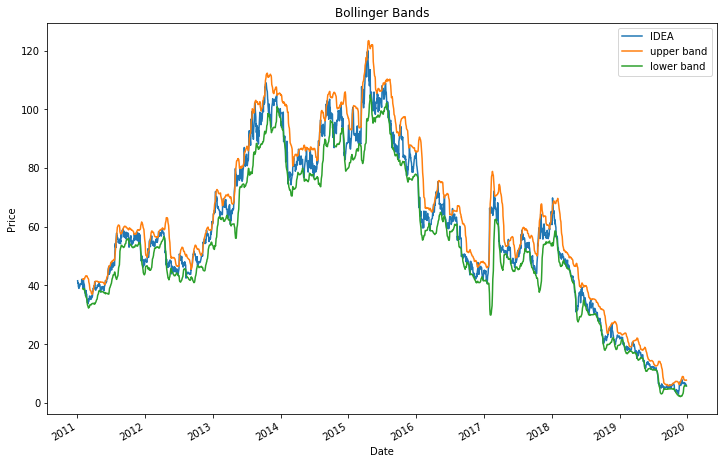

In [14]:

 # Plot raw SPY values, rolling mean and Bollinger Bands
ax = df['IDEA'].plot(title="Bollinger Bands", label='IDEA',figsize =(12,8))
#rm_SPY.plot(label='Rolling mean', ax=ax)
upper_band.plot(label='upper band', ax=ax)
lower_band.plot(label='lower band', ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Price")
ax.legend(loc='upper right')
plt.show()